
<span style="font-family: Arial; font-weight:bold;font-size:2.5em;color:#9ba60a;">Regression+Feature Exam For 30 marks

----------

# 4 Questions X 2 Marks = 8 Marks

-------

In [1]:
#Imports
import numpy as np
import pandas as pd
# Importing matplotlib and seaborn
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
# calculate accuracy measures and confusion matrix

from sklearn.linear_model import LinearRegression
#instital importent regrission model api

from sklearn import metrics


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#9ba60a;"> 1.Read the dataset(GlobalWarming.csv) and check the shape of the dataframe?

In [2]:
data=pd.read_csv("GlobalWarming.csv")


In [3]:
data.head()

,Year,Month,MEI,CO2,CH4,N2O,CFC-11,CFC-12,TSI,Aerosols,Temp
0,1983,5,2.556,345.96,1638.59,303.677,191.324,350.113,1366.1024,0.0863,0.109
1,1983,6,2.167,345.52,1633.71,303.746,192.057,351.848,1366.1208,0.0794,0.118
2,1983,7,1.741,344.15,1633.22,303.795,192.818,353.725,1366.2850,0.0731,0.137
3,1983,8,1.130,342.25,1631.35,303.839,193.602,355.633,1366.4202,0.0673,0.176
4,1983,9,0.428,340.17,1648.40,303.901,194.392,357.465,1366.2335,0.0619,0.149


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#9ba60a;">2.Check for null values and the datatypes?

In [4]:
#Checking the data type of each column
data.dtypes

Year          int64
Month         int64
MEI         float64
CO2         float64
CH4         float64
N2O         float64
CFC-11      float64
CFC-12      float64
TSI         float64
Aerosols    float64
Temp        float64
dtype: object

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#9ba60a;">3. Check the Summary Statistics?

In [5]:
data.describe()

,Year,Month,MEI,CO2,CH4,N2O,CFC-11,CFC-12,TSI,Aerosols,Temp
count,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000
mean,1995.662338,6.551948,0.275555,363.226753,1749.824513,312.391834,251.973068,497.524782,1366.070759,0.016657,0.256776
std,7.423197,3.447214,0.937918,12.647125,46.051678,5.225131,20.231783,57.826899,0.399610,0.029050,0.179090
min,1983.000000,1.000000,-1.635000,340.170000,1629.890000,303.677000,191.324000,350.113000,1365.426100,0.001600,-0.282000
25%,1989.000000,4.000000,-0.398750,353.020000,1722.182500,308.111500,246.295500,472.410750,1365.717050,0.002800,0.121750
50%,1996.000000,7.000000,0.237500,361.735000,1764.040000,311.507000,258.344000,528.356000,1365.980900,0.005750,0.248000
75%,2002.000000,10.000000,0.830500,373.455000,1786.885000,316.979000,267.031000,540.524250,1366.363250,0.012600,0.407250
max,2008.000000,12.000000,3.001000,388.500000,1814.180000,322.182000,271.494000,543.813000,1367.316200,0.149400,0.739000


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#9ba60a;">4. Check the heatmap and write your observation?

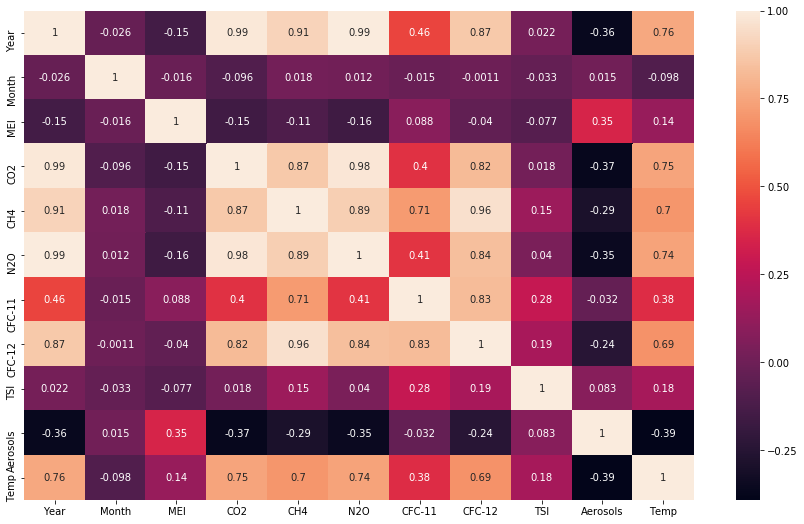

In [6]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams["figure.figsize"]=15,9
heatmap=data.corr()
sns.heatmap(heatmap,annot=True)

In [7]:
#ALL the features which are highly corrrelated we can see them with the light pink shade
# ALL of these features have high multicollinearity with them and one must be dropped

--------

# 5 Questions X 3 Marks = 15 Marks

----------

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#9ba60a;"> 1) .Find the correlations between the variables in the dataset except Date & Month. Which of the following independent variables is N2O highly correlated with (absolute correlation greater than 0.7)? 

In [8]:
df=data.drop(["Month"],axis=1)


In [9]:
df.columns

Index(['Year', 'MEI', 'CO2', 'CH4', 'N2O', 'CFC-11', 'CFC-12', 'TSI',
       'Aerosols', 'Temp'],
      dtype='object')

In [10]:
df=df.drop(["Year"],axis=1)

In [11]:
df.columns

Index(['MEI', 'CO2', 'CH4', 'N2O', 'CFC-11', 'CFC-12', 'TSI', 'Aerosols',
       'Temp'],
      dtype='object')

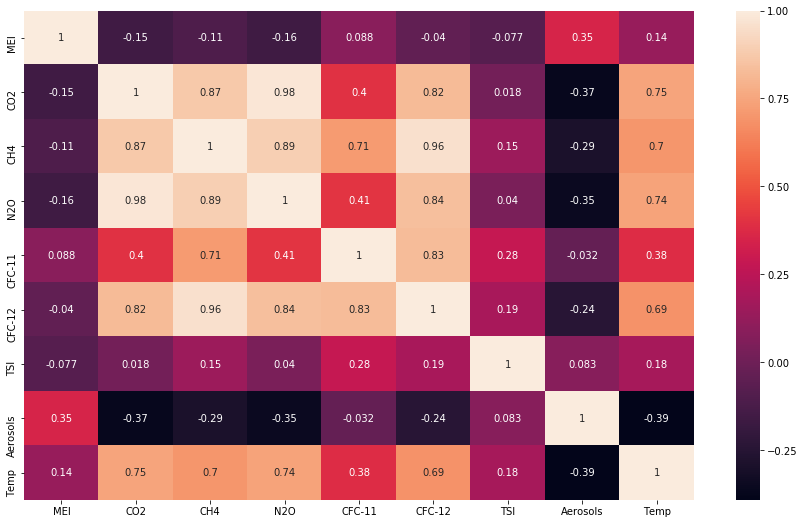

In [12]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams["figure.figsize"]=15,9
heatmap=df.corr()
sns.heatmap(heatmap,annot=True)

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#9ba60a;">2. Split the data into train = 70% and test size = 30%?

In [13]:
X=data.drop(["Temp"],axis=1)
y=data["Temp"]

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test , y_train, y_test = train_test_split(X,y, test_size = 0.30, random_state = 1)
print(X_train.shape)
print(X_test.shape)
print(y_test.shape)

(215, 10)
(93, 10)
(93,)


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#9ba60a;">  3. Build The Model Linear Regression?

In [15]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
model = lin_reg.fit(X_train,y_train)


In [16]:
y_pred=model.predict(X_test)

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#9ba60a;"> 4. Check The R^2, RMSE and MSE?

In [17]:
from sklearn.metrics import r2_score
from sklearn.metrics import roc_curve
from sklearn.metrics import mean_squared_error

In [18]:
mean_squared_error(y_test,y_pred)

0.006699592992457712

In [19]:
print(f'R^2 score for train: {lin_reg.score(X_train, y_train)}')
print(f'R^2 score for test: {lin_reg.score(X_test, y_test)}')

R^2 score for train: 0.7248386147457065
R^2 score for test: 0.7933827612291993


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#9ba60a;"> 5. Check the Adjusted R^2 for Test and Train?

In [20]:
import warnings 
warnings.filterwarnings('ignore')
import statsmodels.api as sm

X_constant = sm.add_constant(X)
lin_reg = sm.OLS(y,X_constant).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Temp   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     88.15
Date:                Fri, 04 Oct 2019   Prob (F-statistic):           8.82e-83
Time:                        15:23:55   Log-Likelihood:                 305.44
No. Observations:                 308   AIC:                            -588.9
Df Residuals:                     297   BIC:                            -547.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -143.1809     52.603     -2.722      0.007    -246.703     -39.658
Year           0.0073      0.019      0.382      0.703      -0.030       0.045
Month         -0.0036      0.002     -1.767      0.078      -0.008       0.000
MEI            0.0665      0.006     10.793      0.000       0.054       0.079
CO2            0.0014      0.003      0.434      0.665      -0.005       0.008
CH4            0.0001      0.001      0.218      0.828      -0.001       0.001
N2O           -0.0159      0.018     -0.883      0.378      -0.051       0.020
CFC-11        -0.0070      0.002     -3.697      0.000      -0.011      -0.003
CFC-12         0.0039      0.001      2.814      0.005       0.001       0.007
TSI            0.0973      0.018      5.287      0.000       0.061       0.134
Aerosols      -1.5878      0.212     -7.481      0.000      -2.006      -1.170
==============================================================================
Omnibus:                        7.361   Durbin-Watson:                   0.964
Prob(Omnibus):                  0.025   Jarque-Bera (JB):                9.949
Skew:                           0.174   Prob(JB):                      0.00691
Kurtosis:                       3.809   Cond. No.                     3.11e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.11e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# ASSUMPTION-1 (NO CORRELATION)

# Durbin- Watson Test.

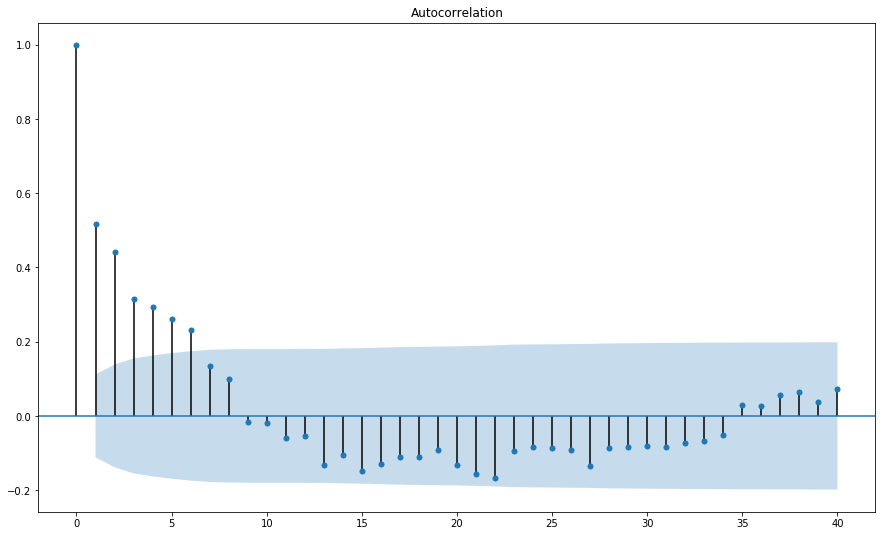

In [21]:
import statsmodels.tsa.api as smt

acf = smt.graphics.plot_acf(lin_reg.resid, lags=40 , alpha=0.05)
acf.show()

# Assumption 2- Normality of Residuals

In [22]:
from scipy import stats
print(stats.jarque_bera(lin_reg.resid))

(9.949145852534382, 0.006911470016545129)


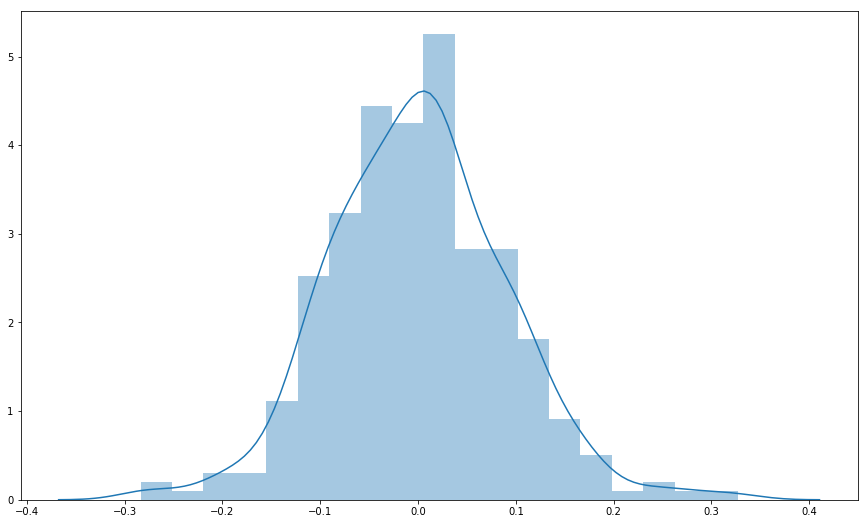

In [23]:
import seaborn as sns

sns.distplot(lin_reg.resid)

# Asssumption 3 - Linearity of residuals
Here we have 2 options. Either we can plot the observed values Vs predicted values and plot the Residual Vs predicted values and see the linearity of residuals.
OR
We can go for rainbow test. Let's look both of them one by one.

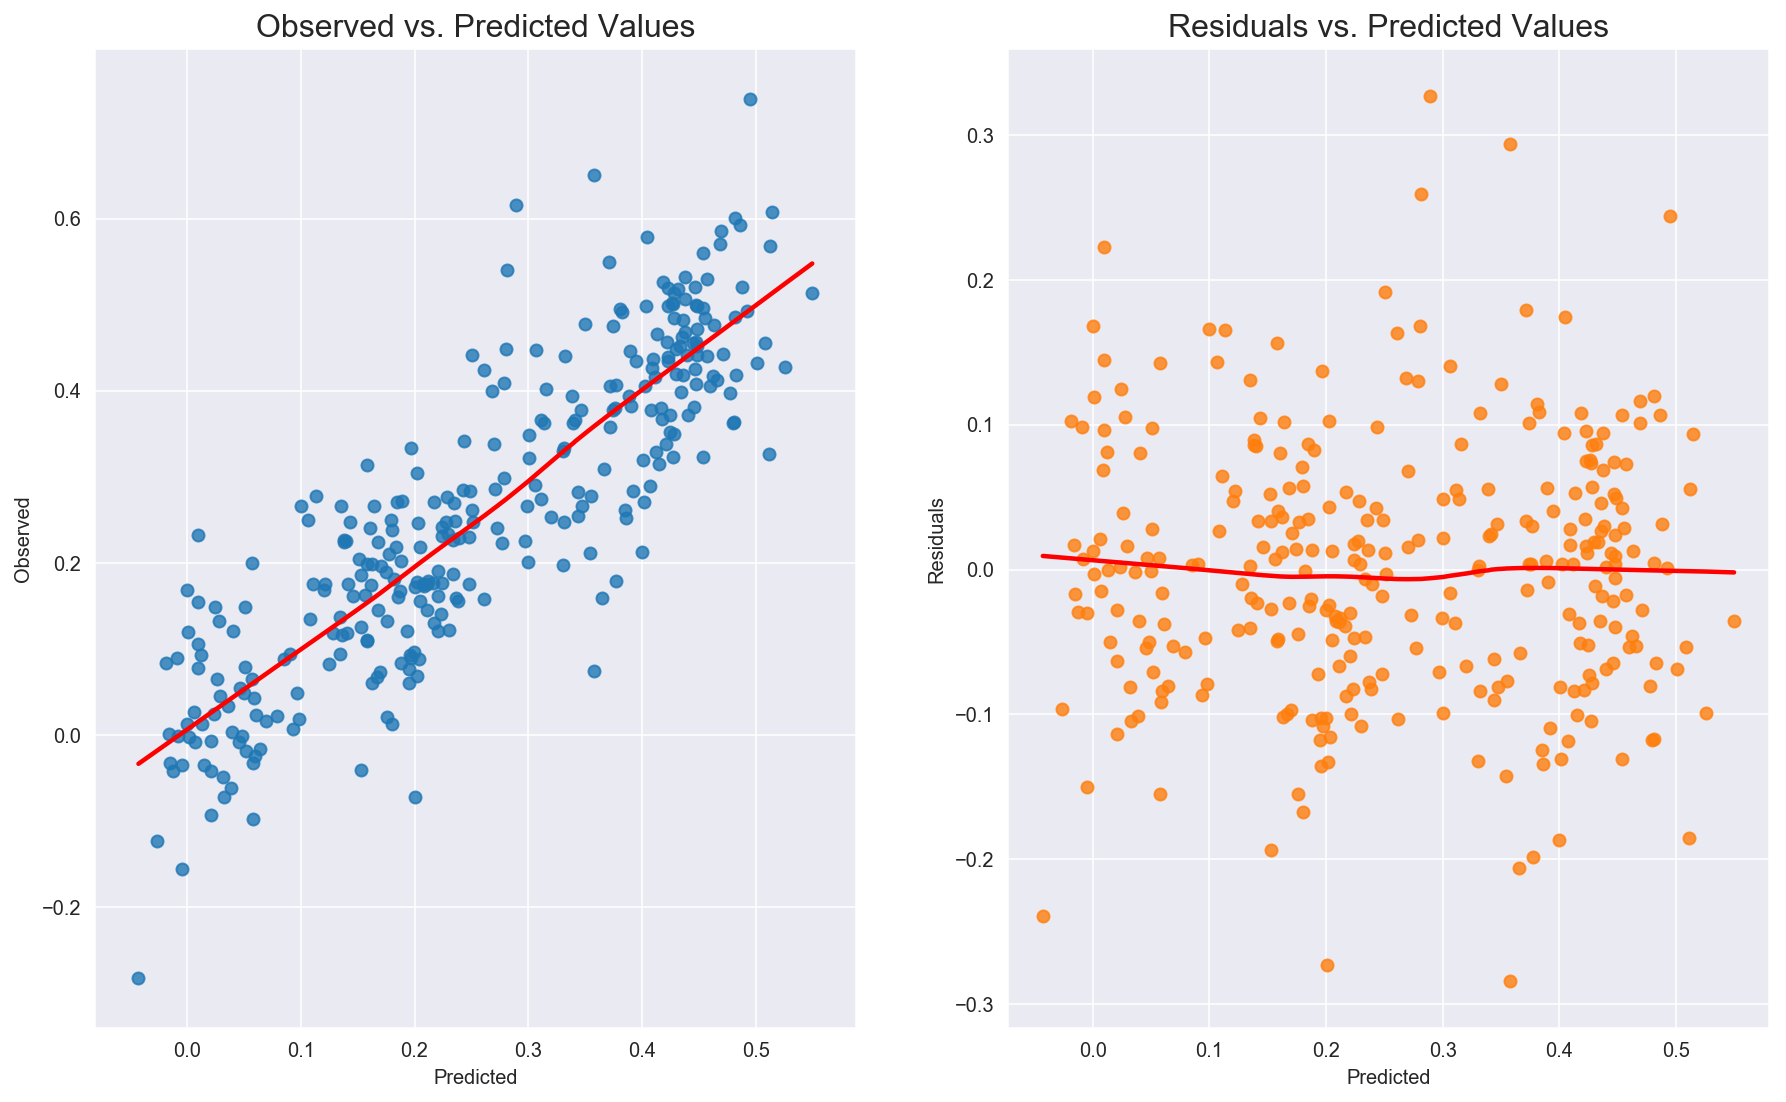

In [24]:
%matplotlib inline
%config InlineBackend.figure_format ='retina'
import seaborn as sns 
import matplotlib.pyplot as plt
import statsmodels.stats.api as sms
sns.set_style('darkgrid')
sns.mpl.rcParams['figure.figsize'] = (15.0, 9.0)

def linearity_test(model, y):
    '''
    Function for visually inspecting the assumption of linearity in a linear regression model.
    It plots observed vs. predicted values and residuals vs. predicted values.
    
    Args:
    * model - fitted OLS model from statsmodels
    * y - observed values
    '''
    fitted_vals = model.predict()
    resids = model.resid

    fig, ax = plt.subplots(1,2)
    
    sns.regplot(x=fitted_vals, y=y, lowess=True, ax=ax[0], line_kws={'color': 'red'})
    ax[0].set_title('Observed vs. Predicted Values', fontsize=16)
    ax[0].set(xlabel='Predicted', ylabel='Observed')

    sns.regplot(x=fitted_vals, y=resids, lowess=True, ax=ax[1], line_kws={'color': 'red'})
    ax[1].set_title('Residuals vs. Predicted Values', fontsize=16)
    ax[1].set(xlabel='Predicted', ylabel='Residuals')
    
linearity_test(lin_reg, y)  

# Rainbow Test

In [25]:
import statsmodels.api as sm
sm.stats.diagnostic.linear_rainbow(res=lin_reg, frac=0.5)

(0.7989436924447891, 0.9141751243335234)

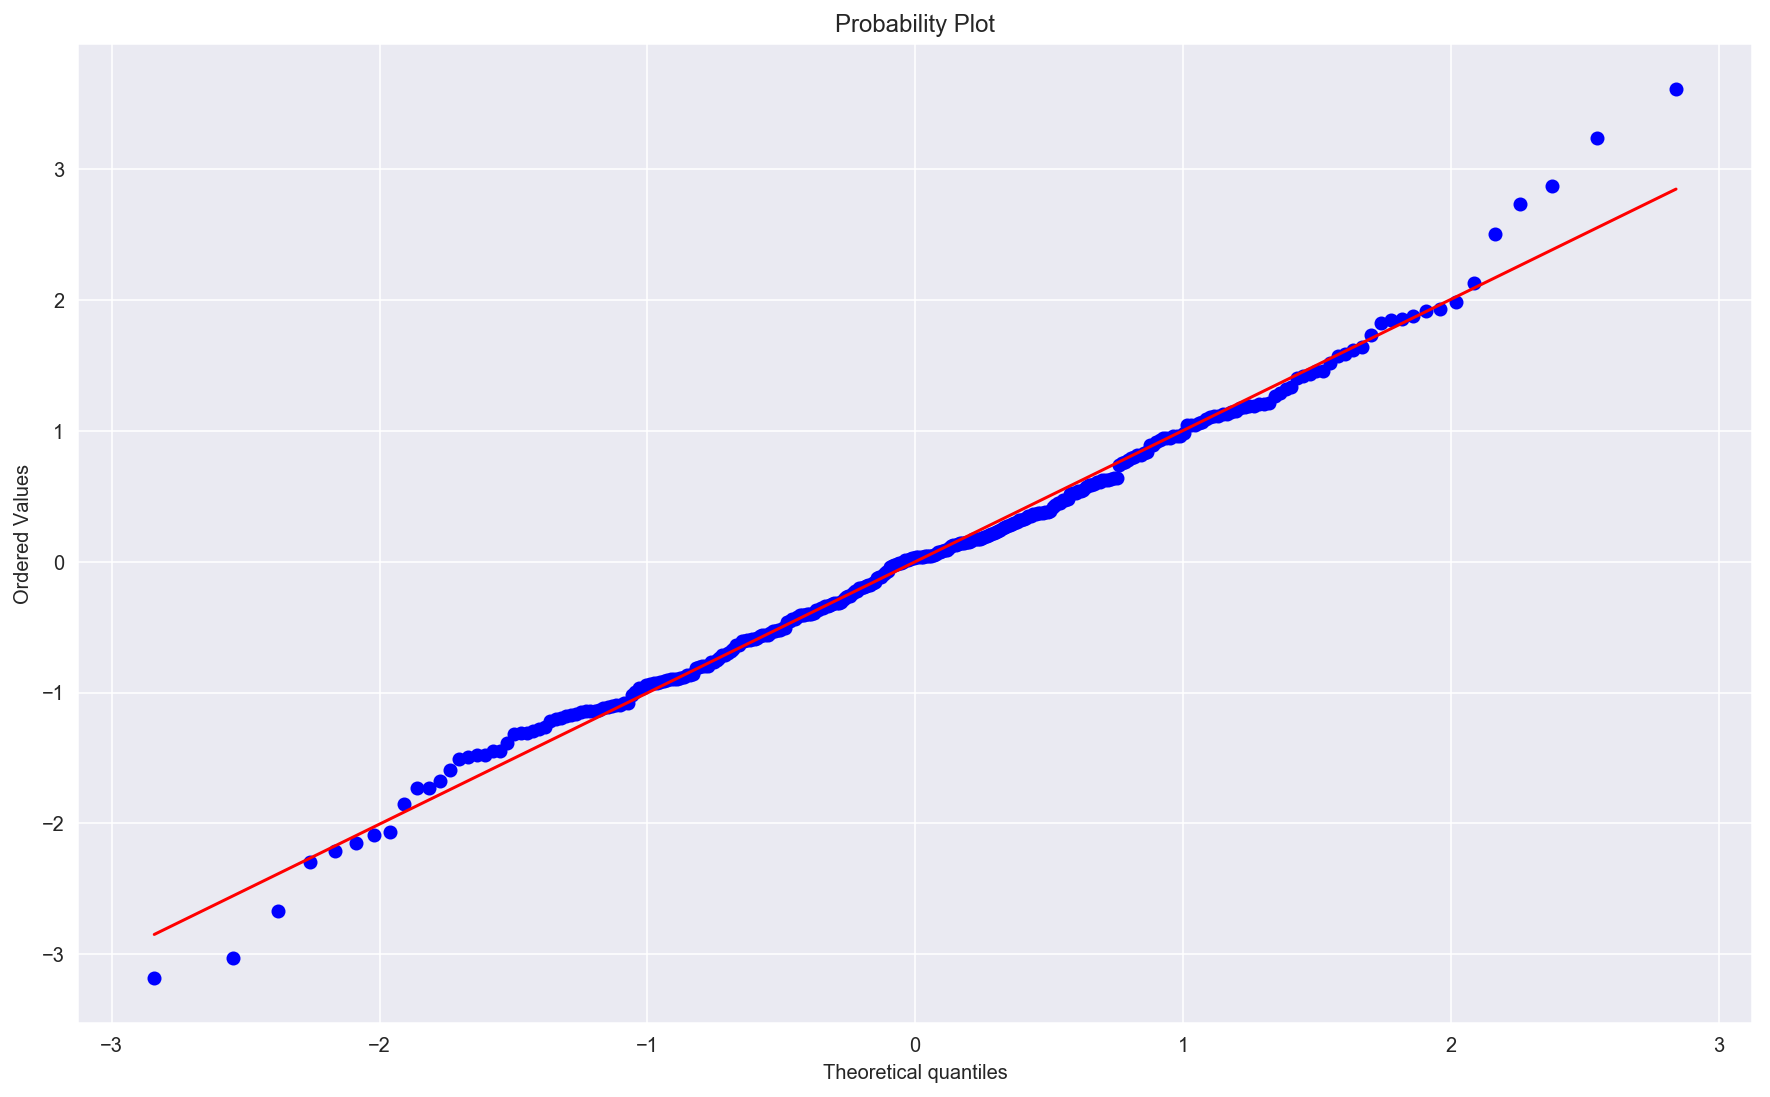

In [26]:
import scipy.stats as stats
import pylab
from statsmodels.graphics.gofplots import ProbPlot
st_residual = lin_reg.get_influence().resid_studentized_internal
stats.probplot(st_residual, dist="norm", plot = pylab)
plt.show()

In [27]:
lin_reg.resid.mean()

9.810965171588103e-14

# Assumption 4 - Homoscedasticity_test(using goldfeld test) OR (Beusch-Wagon Test)

Homoscedacity :: If the residuals are symmetrically distributed across the trend , then it is called as homoscedacious.
Heteroscedacity :: If the residuals are not symmetric across the trend, then it is called as heteroscedacious. In this the residuals can form an arrow shape or any other non symmetrical shape.

# GOLDFELD TEST

[('F statistic', 1.2398672834889035), ('p-value', 0.09991027023684305)]

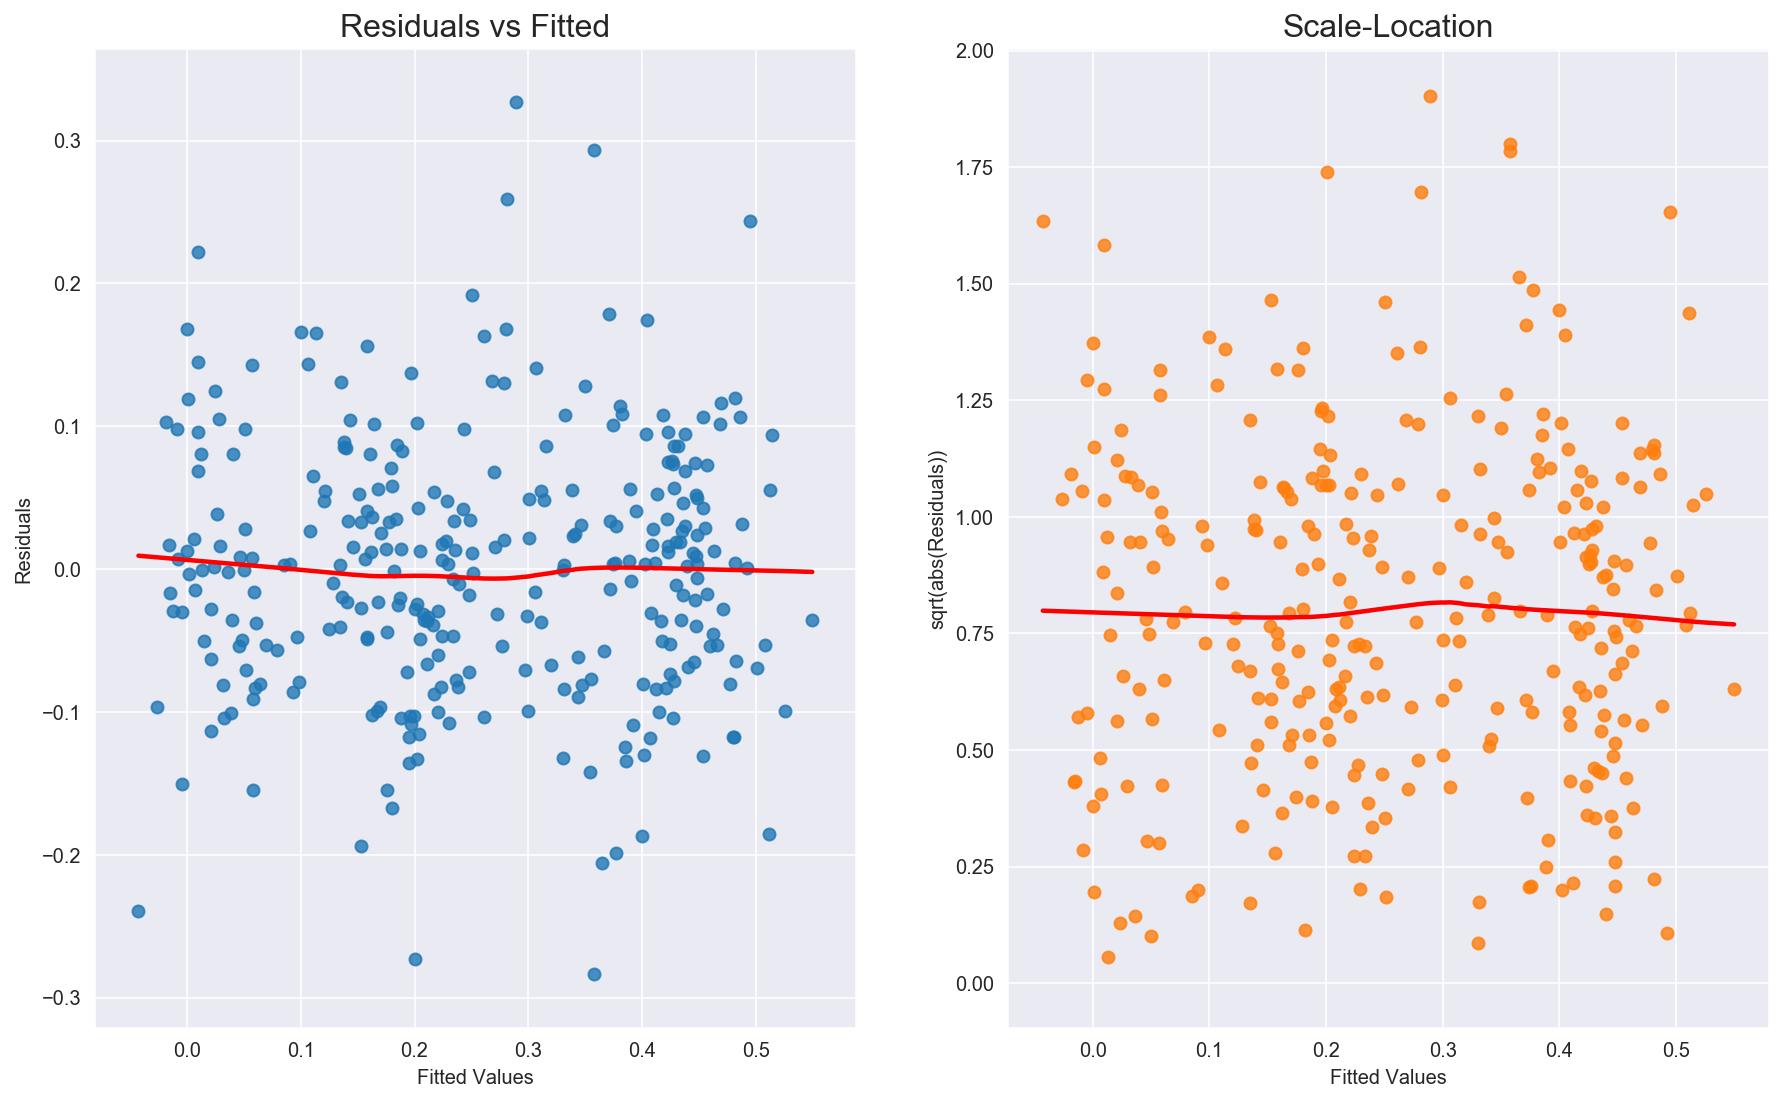

In [28]:
from statsmodels.compat import lzip
import numpy as np
from statsmodels.compat import lzip
%matplotlib inline
%config InlineBackend.figure_format ='retina'
import seaborn as sns 
import matplotlib.pyplot as plt
import statsmodels.stats.api as sms
sns.set_style('darkgrid')
sns.mpl.rcParams['figure.figsize'] = (15.0, 9.0)

model = lin_reg
fitted_vals = model.predict()
resids = model.resid
resids_standardized = model.get_influence().resid_studentized_internal
fig, ax = plt.subplots(1,2)

sns.regplot(x=fitted_vals, y=resids, lowess=True, ax=ax[0], line_kws={'color': 'red'})
ax[0].set_title('Residuals vs Fitted', fontsize=16)
ax[0].set(xlabel='Fitted Values', ylabel='Residuals')
sns.regplot(x=fitted_vals, y=np.sqrt(np.abs(resids_standardized)), lowess=True, ax=ax[1], line_kws={'color': 'red'})
ax[1].set_title('Scale-Location', fontsize=16)
ax[1].set(xlabel='Fitted Values', ylabel='sqrt(abs(Residuals))')

name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(model.resid, model.model.exog)
lzip(name, test)

--------

# 1 Questions X 7 Marks = 7 Marks

------

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#9ba60a;"> 1. Combine the all the above steps to test model performance, Check the VIF Factor remove the columns and Check the Final R^2?

In [29]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = [variance_inflation_factor(X_constant.values, i) for i in range(X_constant.shape[1])]
pd.DataFrame({'vif': vif[1:]}, index=X.columns).T

,Year,Month,MEI,CO2,CH4,N2O,CFC-11,CFC-12,TSI,Aerosols
vif,744.955748,1.820631,1.225843,57.454079,20.349266,325.151873,53.362376,240.712601,1.98781,1.396996


# Iteration 1 with vif

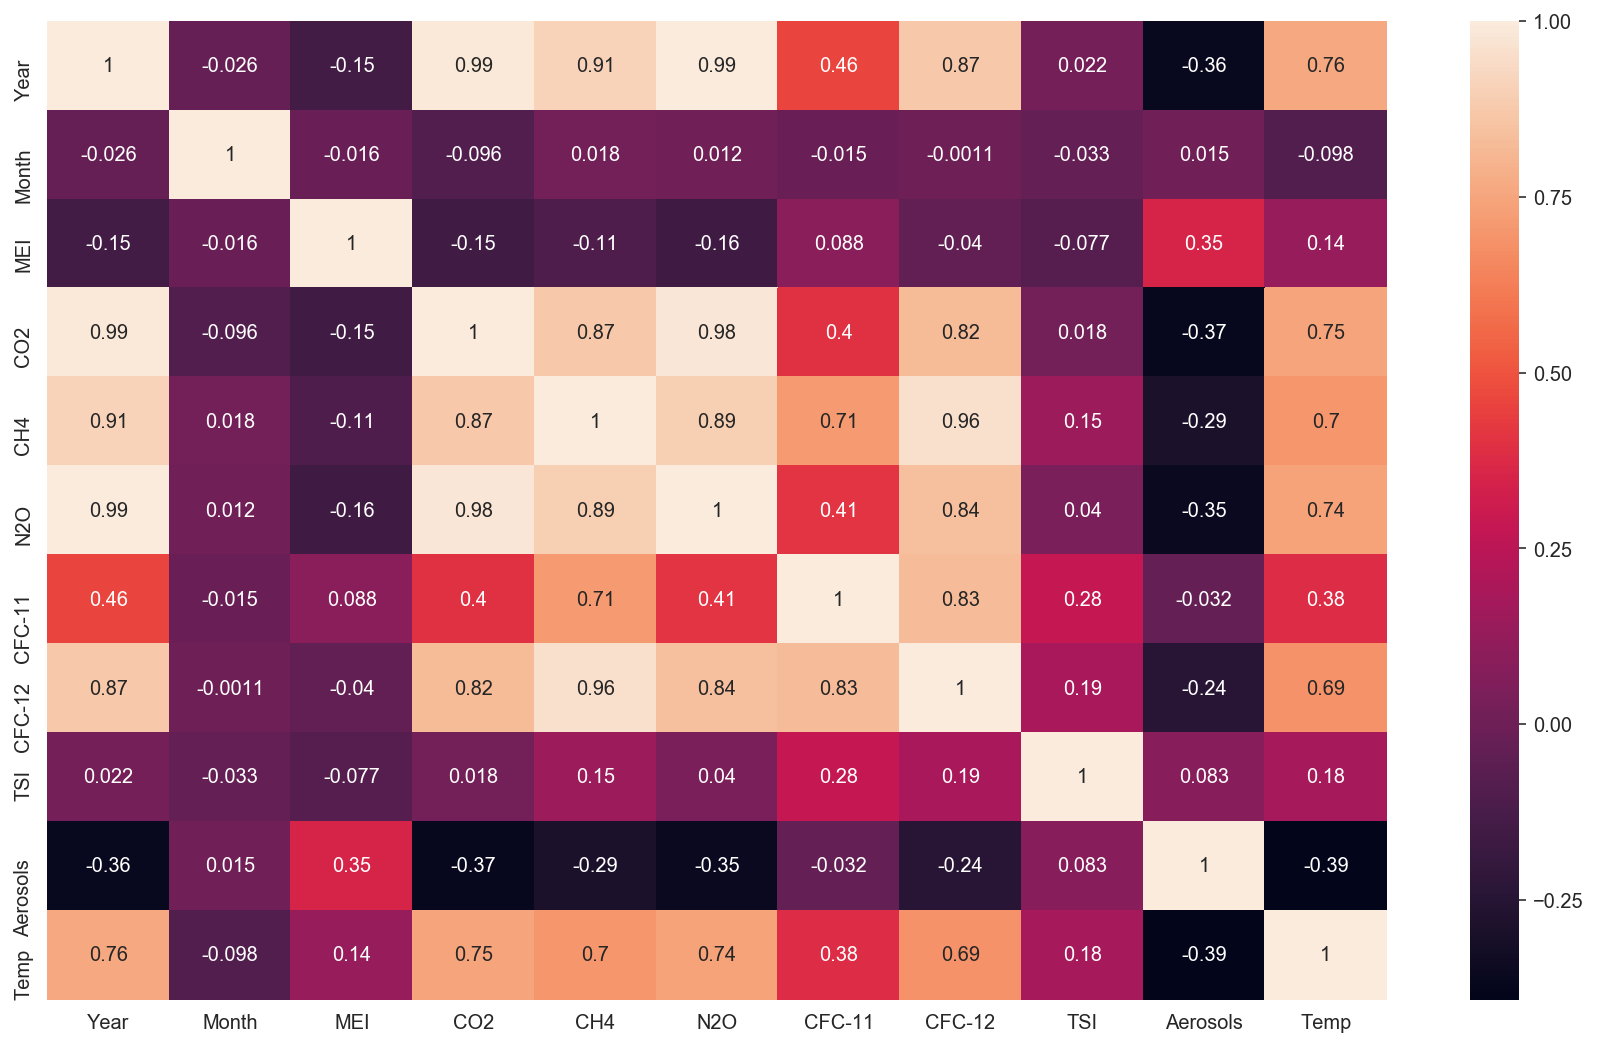

In [30]:
sns.heatmap(data.corr(), annot=True)

In [31]:
data.columns

Index(['Year', 'Month', 'MEI', 'CO2', 'CH4', 'N2O', 'CFC-11', 'CFC-12', 'TSI',
       'Aerosols', 'Temp'],
      dtype='object')

In [32]:
X = data[['Month', 'MEI', 'CO2', 'CH4', 'N2O', 'CFC-11', 'CFC-12', 'TSI','Aerosols']]
y = data['Temp']
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)

print(f'Coefficients: {lin_reg.coef_}')
print(f'Intercept: {lin_reg.intercept_}')
print(f'R^2 score: {lin_reg.score(X, y)}')

Coefficients: [-3.94196350e-03  6.64559152e-02  1.98858727e-03  6.35655290e-05
 -9.83115946e-03 -7.41930784e-03  4.35601153e-03  9.27490369e-02
 -1.60152411e+00]
Intercept: -124.47089975050045
R^2 score: 0.7478671829169418


In [33]:
import warnings 
warnings.filterwarnings('ignore')
import statsmodels.api as sm

X_constant = sm.add_constant(X)
lin_reg = sm.OLS(y,X_constant).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Temp   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     98.21
Date:                Fri, 04 Oct 2019   Prob (F-statistic):           9.29e-84
Time:                        15:24:02   Log-Likelihood:                 305.37
No. Observations:                 308   AIC:                            -590.7
Df Residuals:                     298   BIC:                            -553.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -124.4709     19.137     -6.504      0.000    -162.131     -86.811
Month         -0.0039      0.002     -2.140      0.033      -0.008      -0.000
MEI            0.0665      0.006     10.807      0.000       0.054       0.079
CO2            0.0020      0.003      0.751      0.453      -0.003       0.007
CH4         6.357e-05      0.000      0.128      0.898      -0.001       0.001
N2O           -0.0098      0.008     -1.161      0.246      -0.026       0.007
CFC-11        -0.0074      0.001     -5.102      0.000      -0.010      -0.005
CFC-12         0.0044      0.001      4.996      0.000       0.003       0.006
TSI            0.0927      0.014      6.625      0.000       0.065       0.120
Aerosols      -1.6015      0.209     -7.666      0.000      -2.013      -1.190
==============================================================================
Omnibus:                        6.836   Durbin-Watson:                   0.958
Prob(Omnibus):                  0.033   Jarque-Bera (JB):                8.913
Skew:                           0.172   Prob(JB):                       0.0116
Kurtosis:                       3.759   Cond. No.                     8.61e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.61e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Iteration 2 using vif for better feature selection

In [34]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = [variance_inflation_factor(X_constant.values, i) for i in range(X_constant.shape[1])]
pd.DataFrame({'vif': vif[1:]}, index=X.columns).T

,Month,MEI,CO2,CH4,N2O,CFC-11,CFC-12,TSI,Aerosols
vif,1.48644,1.225823,41.336746,19.129508,72.108194,31.895268,93.688291,1.153434,1.357103


In [35]:
# As N20 and CFC-12 are higly correlated drop CFC-12

In [36]:
X = data[['Month', 'MEI', 'CO2', 'CH4', 'N2O', 'CFC-11', 'TSI','Aerosols']]

In [37]:

y = data['Temp']
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)

print(f'Coefficients: {lin_reg.coef_}')
print(f'Intercept: {lin_reg.intercept_}')
print(f'R^2 score: {lin_reg.score(X, y)}')

Coefficients: [-3.52735298e-03  7.01067927e-02  3.16923876e-03  6.44748977e-04
  1.23441748e-02 -7.00783687e-04  9.48264563e-02 -1.74159330e+00]
Intercept: -135.20906110656017
R^2 score: 0.7267512157737072


In [38]:
import warnings 
warnings.filterwarnings('ignore')
import statsmodels.api as sm

X_constant = sm.add_constant(X)
lin_reg = sm.OLS(y,X_constant).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Temp   R-squared:                       0.727
Model:                            OLS   Adj. R-squared:                  0.719
Method:                 Least Squares   F-statistic:                     99.41
Date:                Fri, 04 Oct 2019   Prob (F-statistic):           1.31e-79
Time:                        15:24:04   Log-Likelihood:                 292.98
No. Observations:                 308   AIC:                            -568.0
Df Residuals:                     299   BIC:                            -534.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -135.2091     19.763     -6.842      0.000    -174.100     -96.318
Month         -0.0035      0.002     -1.844      0.066      -0.007       0.000
MEI            0.0701      0.006     11.048      0.000       0.058       0.083
CO2            0.0032      0.003      1.156      0.249      -0.002       0.009
CH4            0.0006      0.000      1.290      0.198      -0.000       0.002
N2O            0.0123      0.007      1.648      0.100      -0.002       0.027
CFC-11        -0.0007      0.001     -1.219      0.224      -0.002       0.000
TSI            0.0948      0.015      6.520      0.000       0.066       0.123
Aerosols      -1.7416      0.215     -8.095      0.000      -2.165      -1.318
==============================================================================
Omnibus:                       13.516   Durbin-Watson:                   0.911
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               23.408
Skew:                           0.250   Prob(JB):                     8.26e-06
Kurtosis:                       4.254   Cond. No.                     8.36e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.36e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [39]:
# difference b/w r2 and adjusted r2 0.727-0.719=0.008000000000000007

# Iteration 3 using vif for better feature selection

In [40]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = [variance_inflation_factor(X_constant.values, i) for i in range(X_constant.shape[1])]
pd.DataFrame({'vif': vif[1:]}, index=X.columns).T

,Month,MEI,CO2,CH4,N2O,CFC-11,TSI,Aerosols
vif,1.483424,1.20851,41.007535,18.071802,52.284611,4.614062,1.152416,1.332657


In [41]:
#Dropping N20 and C02
X = data[['Month', 'MEI',  'CH4', 'CFC-11', 'TSI','Aerosols']]
y=data["Temp"]

In [42]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)

print(f'Coefficients: {lin_reg.coef_}')
print(f'Intercept: {lin_reg.intercept_}')
print(f'R^2 score: {lin_reg.score(X, y)}')

Coefficients: [-0.00525379  0.07185736  0.00337736 -0.0030239   0.09089182 -1.8426982 ]
Intercept: -129.0104024260852
R^2 score: 0.6927746164138644


In [43]:
import warnings 
warnings.filterwarnings('ignore')
import statsmodels.api as sm

X_constant = sm.add_constant(X)
lin_reg = sm.OLS(y,X_constant).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Temp   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.687
Method:                 Least Squares   F-statistic:                     113.1
Date:                Fri, 04 Oct 2019   Prob (F-statistic):           4.06e-74
Time:                        15:24:04   Log-Likelihood:                 274.93
No. Observations:                 308   AIC:                            -535.9
Df Residuals:                     301   BIC:                            -509.8
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -129.0104     20.800     -6.202      0.000    -169.943     -88.078
Month         -0.0053      0.002     -3.159      0.002      -0.009      -0.002
MEI            0.0719      0.007     10.738      0.000       0.059       0.085
CH4            0.0034      0.000     17.410      0.000       0.003       0.004
CFC-11        -0.0030      0.000     -6.890      0.000      -0.004      -0.002
TSI            0.0909      0.015      5.969      0.000       0.061       0.121
Aerosols      -1.8427      0.225     -8.197      0.000      -2.285      -1.400
==============================================================================
Omnibus:                       10.743   Durbin-Watson:                   0.928
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               20.356
Skew:                           0.109   Prob(JB):                     3.80e-05
Kurtosis:                       4.240   Cond. No.                     8.14e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.14e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test , y_train, y_test = train_test_split(X,y, test_size = 0.30, random_state = 1)
print(X_train.shape)
print(X_test.shape)
print(y_test.shape)

(215, 6)
(93, 6)
(93,)


In [45]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

print(f'Coefficients: {lin_reg.coef_}')
print(f'Intercept: {lin_reg.intercept_}')
print(f'R^2 score: {lin_reg.score(X, y)}')

Coefficients: [-0.00479492  0.0717043   0.00333985 -0.00298177  0.08929664 -1.84893835]
Intercept: -126.77930977572176
R^2 score: 0.6926396269179526


In [46]:
mean_squared_error(y_test,y_pred)

0.006699592992457712